In [1]:
# pip install --upgrade pip

In [2]:
# pip install --upgrade tensorflow keras

Import all the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import PIL.Image
import time
import functools
import IPython.display as display

This function is used to read image, convert it into tensor, and reshape it into target size 256*256.

Here The preprocess_input function from TensorFlow's Keras VGG19 module is used to preprocess input images before they are fed into the VGG19 model.
The preprocess_input function helps in conforming the input image data to match the format expected by the VGG19 model

In [4]:
def load_and_preprocess(image_path, target_size=(512, 512)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

imshow function used to show the image.

In [5]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)

load_and_preprocess take input as a path of image, which is stored in our computer

In [6]:
x=load_and_preprocess("3.jpg")
x

array([[[[ 151.061    ,  138.22101  ,  128.32     ],
         [ 151.061    ,  138.22101  ,  128.32     ],
         [ 151.061    ,  138.22101  ,  128.32     ],
         ...,
         [ 142.061    ,  138.22101  ,  131.32     ],
         [ 144.061    ,  138.22101  ,  131.32     ],
         [ 140.061    ,  136.22101  ,  131.32     ]],

        [[  26.060997 ,    1.2210007,   -9.68     ],
         [  22.060997 ,   -2.7789993,  -13.68     ],
         [  24.060997 ,   -0.7789993,  -11.68     ],
         ...,
         [  64.061    ,   65.221    ,   64.32     ],
         [  67.061    ,   66.221    ,   65.32     ],
         [  96.061    ,   97.221    ,   96.32     ]],

        [[ -48.939003 ,  -87.779    , -100.68     ],
         [ -50.939003 ,  -87.779    , -100.68     ],
         [ -48.939003 ,  -85.779    ,  -98.68     ],
         ...,
         [  24.060997 ,   36.221    ,   39.32     ],
         [  21.060997 ,   30.221    ,   34.32     ],
         [  56.060997 ,   68.221    ,   71.32     ]],

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


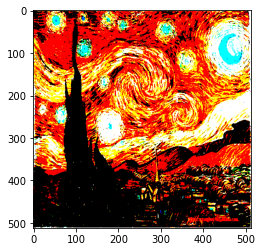

In [7]:
imshow(x)

In [8]:
content_img=load_and_preprocess("home.jpg")
style_img=load_and_preprocess("3.jpg")

In [9]:
content_img.shape

(1, 512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


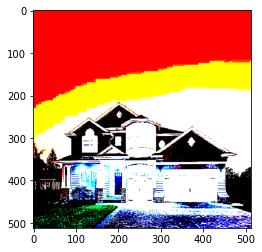

In [10]:
imshow(content_img)

Purpose: Calculates the content loss between two images.
Parameters:
base: Tensor representing the base or content image.
combined: Tensor representing the combined or new generated image.
Returns: The content loss value.

In [11]:
def content_loss(base, combined):
    return 0.5*tf.reduce_sum(tf.square(base - combined))

gram_mat(x)
Purpose: Computes the Gram matrix of the input tensor.
Parameters:
x: Input tensor.
Returns: Gram matrix of the input tensor.
    
This gram_matrix formula taken from the neural style transfer model

The function appears to take a 3D tensor x, transpose it, reshape it into a 2D tensor, and then compute the Gram matrix by performing matrix multiplication on this reshaped tensor and its transpose. 

In [12]:
def gram_mat(x):
    r=x.shape
    N=r[2]
    M=r[0]*r[1]
    
    y=tf.transpose(x,(2,0,1))
    y_shape=tf.shape(y)
    print(y_shape)
    print("a")
    y_reshape=tf.reshape(y,(y_shape[0],y_shape[1]*y_shape[2]))

    gram_mat=tf.matmul(y_reshape, tf.transpose(y_reshape))
    gram_mat=tf.cast(gram_mat, tf.float32)
    
    return gram_mat


In [13]:
gram_mat(x[0])

tf.Tensor([  3 512 512], shape=(3,), dtype=int32)
a


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[6.7491277e+08, 4.7188051e+08, 3.3355107e+08],
       [4.7188051e+08, 7.7468979e+08, 8.8090854e+08],
       [3.3355107e+08, 8.8090854e+08, 1.1663964e+09]], dtype=float32)>

In [14]:
x[0].shape

(512, 512, 3)

Purpose: Computes the style loss between two images.
Parameters:
base: Tensor representing the base image.
combined: Tensor representing the combined image.
Returns: The style loss value.

The style loss function quantifies the difference in style between the base image and the combined image. It's an essential component in the overall loss function used during the optimization process in neural style transfer. 

In [15]:
def style_loss(base, combined):
    sh=base.shape
    N=sh[2]
    M=sh[0]*sh[1]
    S = gram_mat(base)
    print(S.shape)
    G = gram_mat(combined)
    print(G.shape)
    devide=4.0 * (N *N) * (M *M)
    return tf.reduce_sum(tf.square(S - G)/(devide))

In [16]:
image1 = tf.Variable(content_img)

In [17]:
image1[0].shape

TensorShape([512, 512, 3])

In [18]:
style_img.shape

(1, 512, 512, 3)

In [19]:
style_loss(style_img[0],image1[0])

tf.Tensor([  3 512 512], shape=(3,), dtype=int32)
a
(3, 3)
tf.Tensor([  3 512 512], shape=(3,), dtype=int32)
a
(3, 3)


<tf.Tensor: shape=(), dtype=float32, numpy=1088024.1>

This show the name of vgg19 layer

In this we use average pooling layer, according to reseach paper.

In [20]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet',pooling='avg')

for layer in vgg.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
global_average_pooling2d


Purpose: Constructs a VGG19 model with specified layers.
Parameters:
layer_names: List of layer names to include in the model.
Returns: Custom VGG19 model with selected layers.

The function vgg_layers acts as an interface to obtain a VGG19 model that provides intermediate feature maps from specific layers.

In [21]:
def vgg_layers(layer_names):
    base = tf.keras.applications.VGG19(include_top=False, weights='imagenet',pooling='avg')
    base.trainable = False
    outputs = [base.get_layer(name).output for name in layer_names]
    model = tf.keras.Model([base.input], outputs)
    return model

According to paper, we use deeper layer, because, deeper layer have more content of the image.

In [22]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num1 = len(content_layers)
num2 = len(style_layers)

This is one example of extraction of layers of vgg19

In [23]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_img)

In [24]:
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 512, 512, 64)
  min:  0.0
  max:  651.29047
  mean:  26.00122

block2_conv1
  shape:  (1, 256, 256, 128)
  min:  0.0
  max:  3318.6704
  mean:  140.38335

block3_conv1
  shape:  (1, 128, 128, 256)
  min:  0.0
  max:  7883.405
  mean:  133.66525

block4_conv1
  shape:  (1, 64, 64, 512)
  min:  0.0
  max:  15025.106
  mean:  504.92258

block5_conv1
  shape:  (1, 32, 32, 512)
  min:  0.0
  max:  3554.8662
  mean:  41.621426



Purpose: Computes content and style representations for a given image.
Parameters:
style_layer: List of style layers.
content_layer: List of content layers.
img: Image tensor for which representations are to be computed.
Returns: Dictionaries containing content and style representations.

This gives, different layer wise output, based on image we use in it, if we use style image, we take style data, or if we take content image we take content data, or if we take noisy image, then we take both data for gradient descent

In [25]:

def compute(style_layer, content_layer, img):
    model=vgg_layers(style_layer+content_layer)
    
    outputs = model(img)
    style_outputs, content_outputs = (outputs[:len(style_layers)],
                                      outputs[len(style_layers):])
    
    
    content_dict = {content_name: value
                    for content_name, value
                    in zip(content_layer, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(style_layer, style_outputs)}
    
    return {'content': content_dict, 'style': style_dict}

Style_target- comput style layer data, when we pass style image in it

content_target-- compute content layer data, when we pass content image in it

In [26]:
style_targets  = compute(style_layers,content_layers,style_img)['style']
content_targets = compute(style_layers,content_layers,content_img)['content']

The below code generate a noisy image of same shape ans size as content image

In [27]:
generated_image = tf.Variable(content_img)

This two are hyperparameter here,  we try differnet differnet weights, and check on what value it gives best result

Accordint to paper-- content_weight/style_weight = 1e-4

In [28]:
style_weight=1e-2
content_weight=1e4

Below code, gives total loss value, after multiply both with their corresponding weight

In [29]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    
    loss_style= 0
    for name in style_outputs.keys():
        loss_style+=style_loss(style_targets[name][0],style_outputs[name][0])
        
    loss_content=0;
    for name in content_outputs.keys():
        loss_content+=content_loss(content_targets[name][0], content_outputs[name][0])
        
    loss_style*= style_weight/len(style_layers)
    loss_content*= content_weight/len(content_layers)
    
    return loss_style+loss_content


This code convert, tensor data to image, and showing image also, using tensorflow library


In [41]:
def tensor_to_image(tensor):
#     tensor = tensor*255
    preprocess_input(tensor)
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

Here we use Adam optimiser, because of slow compoutation power of my laptop

we can use LBFGS, it gives better results than Adam

In [42]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

Here we use gradient tape tensorflow library to train the model, calculate gradient descent, and apply optimiser,

In [43]:

def train_step(image):
    with tf.GradientTape() as tape:
        outputs = compute(style_layers,content_layers,image)
        loss = style_content_loss(outputs)

    grad = tape.gradient(loss, image)
    optimiser.apply_gradients([(grad, image)])
    image.assign(image)

In [44]:
train_step(generated_image)

tf.Tensor([ 64 512 512], shape=(3,), dtype=int32)
a
(64, 64)
tf.Tensor([ 64 512 512], shape=(3,), dtype=int32)
a
(64, 64)
tf.Tensor([128 256 256], shape=(3,), dtype=int32)
a
(128, 128)
tf.Tensor([128 256 256], shape=(3,), dtype=int32)
a
(128, 128)
tf.Tensor([256 128 128], shape=(3,), dtype=int32)
a
(256, 256)
tf.Tensor([256 128 128], shape=(3,), dtype=int32)
a
(256, 256)
tf.Tensor([512  64  64], shape=(3,), dtype=int32)
a
(512, 512)
tf.Tensor([512  64  64], shape=(3,), dtype=int32)
a
(512, 512)
tf.Tensor([512  32  32], shape=(3,), dtype=int32)
a
(512, 512)
tf.Tensor([512  32  32], shape=(3,), dtype=int32)
a
(512, 512)


Belowe image is after one iteration, if we increase the number of iteration, then quality increases.

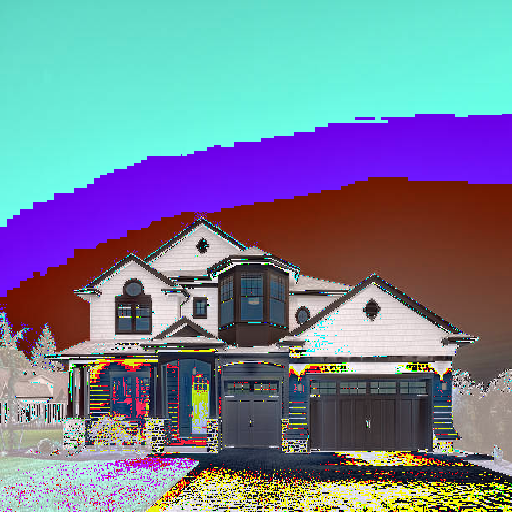

In [45]:
tensor_to_image(generated_image)

This is for more iteration

In [35]:
# epochs = 5
# steps_per_epoch = 10

# step = 0
# for n in range(epochs):
#     for m in range(steps_per_epoch):
#         step += 1
#         train_step(generated_image)
#         print(".", end='', flush=True)
#     display.clear_output(wait=True)
#     display.display(tensor_to_image(generated_image))
    


For this model, i not used any dataset for training, because, i use vgg19, tranfer learning model, which already trained on IMAGENET datase. So i only use the weights of the layers of this pretrained model, to generate combined image.


Drawbacks:- 

1.This model gives good results, but there are few hyperparameter to train, like weights of content image and style image.

2.This basic method tends to generate visual noise and unwanted high-frequency artifacts in the output. To mitigate this, introduce a regularization term specifically targeting the high-frequency elements of the image. This term is commonly referred to as the "total variation loss" in style transfer.



Future work to do

1. Implimneting total variation loss

2. Try some other model also

3. Hyperparameter tuning of weights is required

4. Try with some other optimiser


Due to time bound, i not able to apply all the related work, but i give my best for this project, in future, i complete it with greater accuracy.

Thanks

Aman Dhanotiya 20113019(IIT Roorkee) 
